In [359]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GroupKFold

seed = 42
np.random.seed(seed)

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"

dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [360]:
def imprime_resultados(results):
    media = results['test_score'].mean()
    desvio_padrao = results['test_score'].std()
    print("Accuracy com cross validation = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

<AxesSubplot: xlabel='km_por_ano', ylabel='preco'>

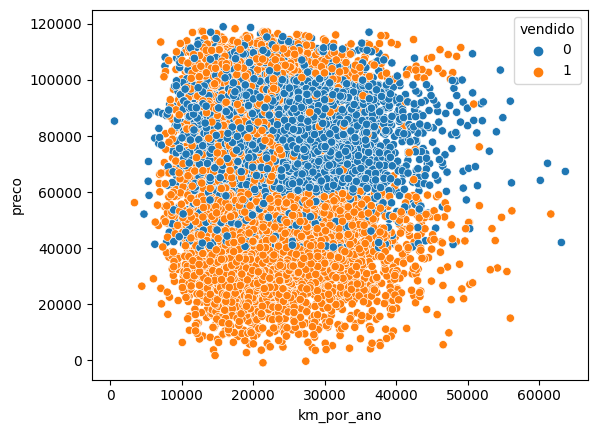

In [361]:
x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados['vendido']
sns.scatterplot(x='km_por_ano',y='preco',hue='vendido',data=dados)

In [362]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(X_train), len(X_test)))

Treinaremos com 7500 elementos e testaremos com 2500 elementos


In [363]:
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(X_train, y_train)
acuracia = dummy_stratified.score(X_test, y_test) * 100

print("A acurácia do dummy stratified foi de %.2f%%" % acuracia)


A acurácia do dummy stratified foi de 48.88%


In [364]:
modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(X_train,y_train)
prev = modelo.predict(X_test)

print(f'Acurácia do modelo: {round(accuracy_score(y_test,prev),2)*100}%')


Acurácia do modelo: 75.0%


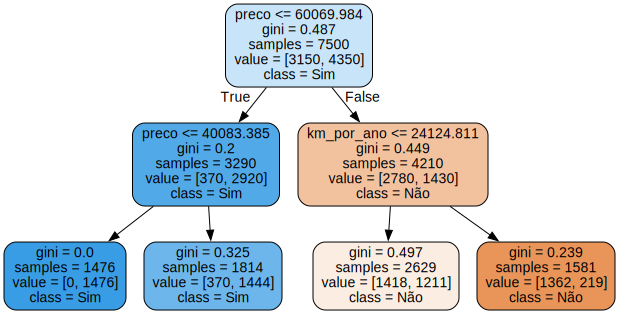

In [365]:
features = x.columns
dot_data = export_graphviz(modelo, out_file=None, filled = True, rounded=True, feature_names=features, class_names=['Não','Sim'])
grafico = graphviz.Source(dot_data)
grafico

In [366]:
seed = 42
np.random.seed(seed)

modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = 3, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [74.99, 76.57]


In [367]:
seed = 42
np.random.seed(seed)

modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = 5, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [75.21, 76.35]


In [368]:
seed = 42
np.random.seed(seed)

modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = 10, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [74.24, 77.32]


In [369]:
seed = 42
np.random.seed(seed)

cv = StratifiedKFold(n_splits = 10, shuffle=True)
modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = cv, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [72.44, 79.12]


In [370]:
seed = 42
np.random.seed(seed)

dados["modelo"] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min())
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,20
1,40557.96,1,20,12622.05362,23
2,89627.50,0,12,11440.79806,13
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,7


In [385]:
seed = 42
np.random.seed(seed)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results  = cross_validate(modelo, x, y, cv = cv, return_train_score=False, groups = dados.modelo)
imprime_resultados(results)

Accuracy com cross validation = [72.29, 79.26]


In [386]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

seed = 42
np.random.seed(seed)

scaler = StandardScaler()
scaler.fit(X_train)
treino_x_escalado = scaler.transform(X_train)
teste_x_escalado = scaler.transform(X_test)

modelo = SVC()
modelo.fit(treino_x_escalado, y_train)
previsoes = modelo.predict(teste_x_escalado)

acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurácia foi de %.2f %%" % acuracia)

A acurácia foi de 76.04 %


In [387]:
seed = 42
np.random.seed(seed)

cv = GroupKFold(n_splits = 10)
modelo = SVC()
results  = cross_validate(modelo, x, y, cv = cv, return_train_score=False, groups = dados.modelo)
imprime_resultados(results)

Accuracy com cross validation = [73.96, 80.42]


In [389]:
from sklearn.pipeline import Pipeline

seed = 42
np.random.seed(seed)

scaler =StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao', scaler), ('estimador', modelo)])

cv = GroupKFold(n_splits = 10)
result = cross_validate(pipeline, x, y, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy com cross validation = [73.96, 80.42]
